Mean Squared Error: 19.571095948499238
Root Mean Squared Error (RMSE): 4.423923139985508
Mean Absolute Error (MAE): 3.2071503827973302
R² (R-squared): 0.7723407733680387


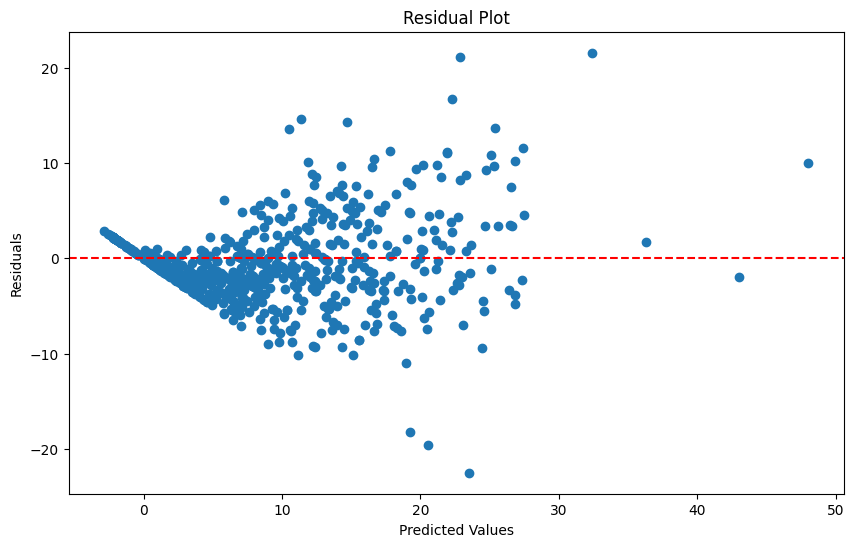

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)



players_df_5 = pd.read_csv('../../data/processed/lr_model_manual_feature3_training_testing_dataset.csv')
players_df_5.dropna(ignore_index=True, inplace=True)

# preparing the training/testing splits
training_df_5 = players_df_5[players_df_5['Season'] != 2024].reset_index(drop=True)
testing_df_5 = players_df_5[players_df_5['Season'] == 2024].reset_index(drop=True)

# preparing the training/testing splits
X_train_5 = training_df_5.drop(columns=['HR', 'Season'])
y_train_5 = training_df_5['HR']

X_test_5 = testing_df_5.drop(columns=['HR', 'Season'])
y_test_5 = testing_df_5['HR']

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_5, y_train_5)

# Make predictions on the test set
y_pred = model.predict(X_test_5)

# Evaluate the model (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test_5, y_pred)
print(f'Mean Squared Error: {mse}')

# MSE is already computed, so we take its square root to get RMSE
rmse = np.sqrt(mean_squared_error(y_test_5, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test_5, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test_5, y_pred)
print("R² (R-squared):", r2)

# Residuals (actual - predicted values)
residuals = y_test_5 - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
X_train_5.insert(0, 'intercept', 1)
X_test_5.insert(0, 'intercept', 1)
sm_model_5 = sm.OLS(y_train_5, X_train_5).fit()
sm_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     5217.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:26:29   Log-Likelihood:                -21315.
No. Observations:                7404   AIC:                         4.264e+04
Df Residuals:                    7398   BIC:                         4.268e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -5.6029      0.292    -19.164      0.000      -6.176      -5.030
season_factor     4.5861      0.327     14.015      0.000       3.945       5.228
RBI/G            11.9911      0.334     35.913      0.000      11.337      12.646
BB                0.2575      0.003     82.774      0.000       0.251       0.264
Barrel%          19.8725      1.141     17.414      0.000      17.635      22.110
HardHit%         -0.9608      0.340     -2.824      0.005      -1.628      -0.294
==============================================================================
Omnibus:                     1207.549   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7625.382
Skew:                           0.628   Prob(JB):                         0.00
Kurtosis:                       7.810   Cond. No.                         637.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_test_5_predictions = sm_model_5.predict(X_test_5)

r2 = r2_score(y_test_5, y_test_5_predictions)

print(f"R squared: {r2}")

R squared: 0.7723407733680409
